In [3]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np


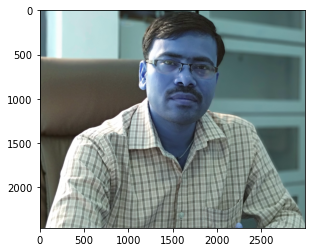

In [4]:
im =  cv2.imread('img6.jpg') #Reads an image into BGR Format
plt.imshow(im)



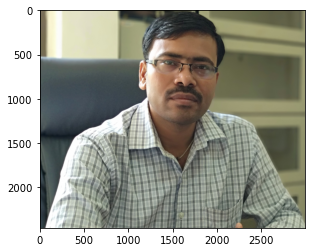

In [5]:
im1 = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
#im = cv2.cvtColor(im,cv2.COLOR_RGB2HSV)
plt.imshow(im1)


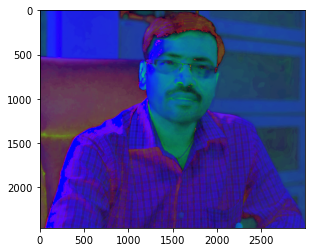

In [6]:
im2 = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
plt.imshow(im2)


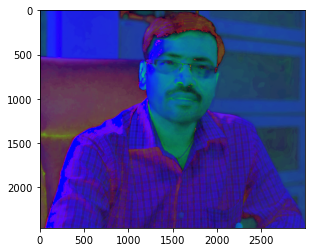

In [7]:
im1 = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im1,cv2.COLOR_RGB2HSV)
plt.imshow(im3)


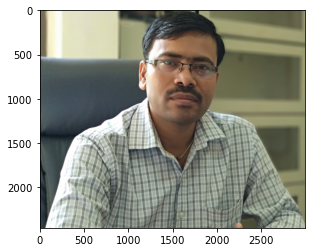

In [8]:
im4=cv2.cvtColor(im3,cv2.COLOR_HSV2RGB)
plt.imshow(im4)

(2456, 2992, 3)


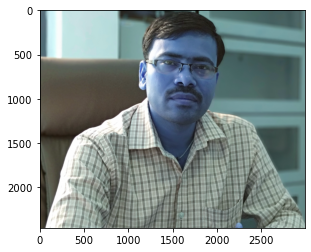

In [9]:
im5 = cv2.cvtColor(im2,cv2.COLOR_HSV2BGR)
plt.imshow(im5)
print(im5.shape)

In [ ]:
## code to determine the no of clusters automatically

all_pixels  = im3.reshape((-1,3))
sse ={}

for k in range (1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(all_pixels)
    sse[k]=kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("number of clusters")
plt.ylabel("sse")
plt.show()

In [ ]:
## code to determine the no of clusters automatically
for e in sse.values():
    print(e)

In [ ]:
p=sse[3]-sse[4]
p=p/sse[3]
print(p)

In [ ]:
## code to determine the no of clusters automatically
t=sse[1]
no_of_clusters=11
for k,v in sse.items():
    if k==1:
        continue
    else:
        gain=t-v
        x=0.3*t
        t=v
        if gain<x:
            no_of_clusters=k-1
            break
print(no_of_clusters)

In [ ]:
#no_of_clusters=3
dominant_colors = no_of_clusters
print(all_pixels.shape)
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')
print(im3.shape)
s1=im3.shape[0]
print(s1)
s2=im3.shape[1]
print(s2)
print(centers.shape)
print(centers)


In [ ]:
i = 1

#plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [ ]:
for i in range (no_of_clusters):
    
    new_img = np.zeros((s1*s2,3),dtype='uint8')

    print(new_img.shape)
    for ix in range(new_img.shape[0]):
        new_img[ix] = 255

# for specific color extraction
    for ix in range(new_img.shape[0]):
        if km.labels_[ix] == i:
            new_img[ix] = colors[km.labels_[ix]]
    
    new_img = new_img.reshape((im.shape))
    im3 = cv2.cvtColor(new_img,cv2.COLOR_HSV2RGB)
    #im3 = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
    plt.imshow(im3)
    plt.show()
    